In [1]:
%load_ext music21.ipython21
from music21 import *
from emmsap import similarityDB, mysqlEM
em = mysqlEM.EMMSAPMysql()

In [2]:
p = em.pieceByFilename('Vendome_Contratenor_IIr_1.xml')
p.id

481

In [3]:
ss = similarityDB.SimilaritySearcher()
ss.skipGroups = []
ss.minThreshold = 6750

In [4]:
ratios = ss.ratiosForPiece(p.id)
ratios

[RatioMatch(thisSegmentId=88531, otherSegmentId=154690, thisRatio=7500),
 RatioMatch(thisSegmentId=88534, otherSegmentId=154692, thisRatio=7042),
 RatioMatch(thisSegmentId=88533, otherSegmentId=154692, thisRatio=7000),
 RatioMatch(thisSegmentId=88534, otherSegmentId=154693, thisRatio=6760),
 RatioMatch(thisSegmentId=88532, otherSegmentId=154691, thisRatio=6750),
 RatioMatch(thisSegmentId=88531, otherSegmentId=154689, thisRatio=6750)]

In [5]:
goodRatios = [r if ss.checkForShow(p, r)[0] is True else None for r in ratios]
goodRatios

[RatioMatch(thisSegmentId=88531, otherSegmentId=154690, thisRatio=7500),
 RatioMatch(thisSegmentId=88534, otherSegmentId=154692, thisRatio=7042),
 RatioMatch(thisSegmentId=88533, otherSegmentId=154692, thisRatio=7000),
 RatioMatch(thisSegmentId=88534, otherSegmentId=154693, thisRatio=6760),
 RatioMatch(thisSegmentId=88532, otherSegmentId=154691, thisRatio=6750),
 RatioMatch(thisSegmentId=88531, otherSegmentId=154689, thisRatio=6750)]

In [6]:
parts = [p.partsFromSegmentPair(*r) for r in goodRatios]
parts

[(<music21.stream.Part MusicXML Part>, <music21.stream.Part Contratenor>),
 (<music21.stream.Part MusicXML Part>, <music21.stream.Part Contratenor>),
 (<music21.stream.Part MusicXML Part>, <music21.stream.Part Contratenor>),
 (<music21.stream.Part MusicXML Part>, <music21.stream.Part Contratenor>),
 (<music21.stream.Part MusicXML Part>, <music21.stream.Part Contratenor>),
 (<music21.stream.Part MusicXML Part>, <music21.stream.Part Contratenor>)]

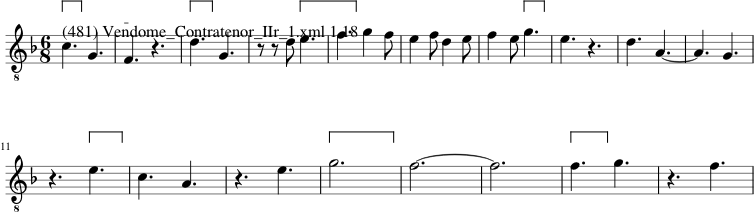

In [7]:
parts[0][0].show()

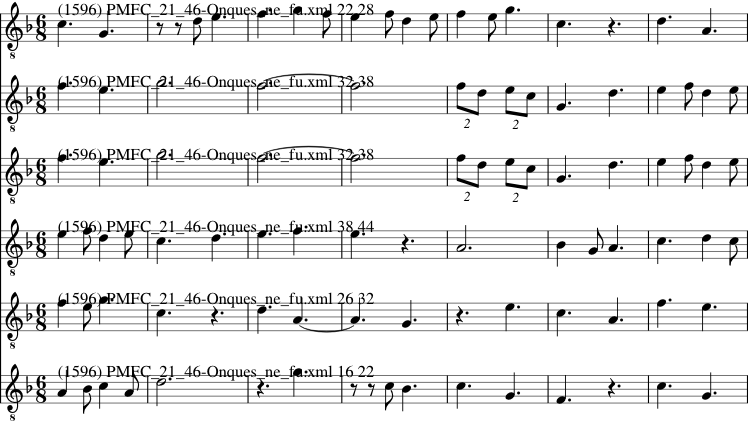

In [9]:
s = stream.Score()
for o in parts:
    s.append(o[1])
s.show()